In [2]:
"""
1.1 Build a circuit

chapter == circuit construction
        -> circuits

quantum computing circuits and how to create them
"""

'\n1.1 Build a circuit \n\nchapter == circuit construction \n        -> circuits\n\nquantum computing circuits and how to create them \n'

In [3]:
!pip install --quiet cirq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.5/597.5 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.1/425.1 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 39.9 MB/s eta 0:00:00


In [5]:
import cirq

In [6]:
"""
Conceptual overview
"""

'\nConceptual overview\n'

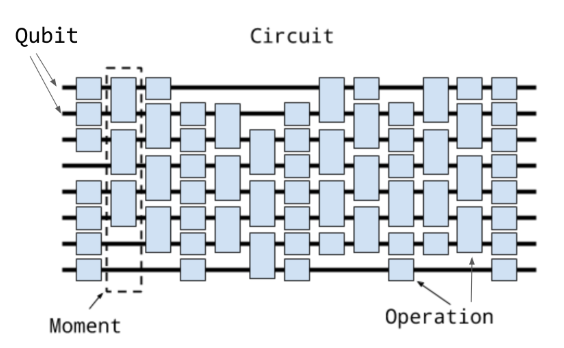

In [7]:
qubits = cirq.GridQubit.square(3)

print(qubits[0])
print(qubits)

q(0, 0)
[cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(1, 0), cirq.GridQubit(1, 1), cirq.GridQubit(1, 2), cirq.GridQubit(2, 0), cirq.GridQubit(2, 1), cirq.GridQubit(2, 2)]


In [8]:
# This is a Pauli X gate. It is an object instance.
x_gate = cirq.X
# Applying it to the qubit at location (0, 0) (defined above)
# turns it into an operation.
x_op = x_gate(qubits[0])

print(x_op)

X(q(0, 0))


In [9]:
cz = cirq.CZ(qubits[0], qubits[1])
x = cirq.X(qubits[2])
moment = cirq.Moment(x, cz)

print(moment)

  ╷ 0 1 2
╶─┼───────
0 │ @─@ X
  │


In [10]:
cz01 = cirq.CZ(qubits[0], qubits[1])
x2 = cirq.X(qubits[2])
cz12 = cirq.CZ(qubits[1], qubits[2])
moment0 = cirq.Moment([cz01, x2])
moment1 = cirq.Moment([cz12])
circuit = cirq.Circuit((moment0, moment1))

print(circuit)

(0, 0): ───@───────
           │
(0, 1): ───@───@───
               │
(0, 2): ───X───@───


In [11]:
"""
constructing the circuits
"""

'\nconstructing the circuits \n'

In [12]:
q0, q1, q2 = [cirq.GridQubit(i, 0) for i in range(3)]
circuit = cirq.Circuit()
circuit.append([cirq.CZ(q0, q1), cirq.H(q2)])

print(circuit)

(0, 0): ───@───
           │
(1, 0): ───@───

(2, 0): ───H───


In [13]:
circuit.append([cirq.H(q0), cirq.CZ(q1, q2)])

print(circuit)

(0, 0): ───@───H───
           │
(1, 0): ───@───@───
               │
(2, 0): ───H───@───


In [14]:
circuit = cirq.Circuit()
circuit.append([cirq.CZ(q0, q1), cirq.H(q2), cirq.H(q0), cirq.CZ(q1, q2)])

print(circuit)

(0, 0): ───@───H───
           │
(1, 0): ───@───@───
               │
(2, 0): ───H───@───


In [15]:
"""
insert stratergies
"""

'\ninsert stratergies\n'

In [16]:
from cirq.circuits import InsertStrategy

circuit = cirq.Circuit()
circuit.append([cirq.CZ(q0, q1)])
circuit.append([cirq.H(q0), cirq.H(q2)], strategy=InsertStrategy.EARLIEST)

print(circuit)

(0, 0): ───@───H───
           │
(1, 0): ───@───────

(2, 0): ───H───────


In [17]:
circuit = cirq.Circuit()
circuit.append([cirq.H(q0), cirq.H(q1), cirq.H(q2)], strategy=InsertStrategy.NEW)

print(circuit)

(0, 0): ───H───────────

(1, 0): ───────H───────

(2, 0): ───────────H───


In [18]:
circuit = cirq.Circuit()
circuit.append([cirq.CZ(q1, q2)])
circuit.append([cirq.CZ(q1, q2)])
circuit.append([cirq.H(q0), cirq.H(q1), cirq.H(q2)], strategy=InsertStrategy.INLINE)

print(circuit)

(0, 0): ───────────H───

(1, 0): ───@───@───H───
           │   │
(2, 0): ───@───@───H───


In [19]:
circuit = cirq.Circuit()
circuit.append([cirq.H(q0)])
circuit.append([cirq.CZ(q1, q2), cirq.H(q0)], strategy=InsertStrategy.NEW_THEN_INLINE)

print(circuit)

(0, 0): ───H───H───

(1, 0): ───────@───
               │
(2, 0): ───────@───


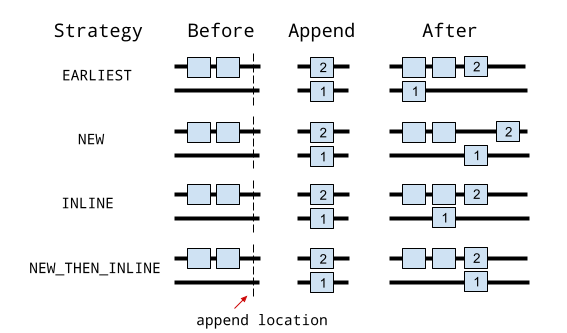

In [20]:
"""
Patterns for arguments to append and insert
"""

'\nPatterns for arguments to append and insert\n'

In [21]:
def my_layer():
    yield cirq.CZ(q0, q1)
    yield [cirq.H(q) for q in (q0, q1, q2)]
    yield [cirq.CZ(q1, q2)]
    yield [cirq.H(q0), [cirq.CZ(q1, q2)]]


circuit = cirq.Circuit()
circuit.append(my_layer())

for x in my_layer():
    print(x)

CZ(q(0, 0), q(1, 0))
[cirq.H(cirq.GridQubit(0, 0)), cirq.H(cirq.GridQubit(1, 0)), cirq.H(cirq.GridQubit(2, 0))]
[cirq.CZ(cirq.GridQubit(1, 0), cirq.GridQubit(2, 0))]
[cirq.H(cirq.GridQubit(0, 0)), [cirq.CZ(cirq.GridQubit(1, 0), cirq.GridQubit(2, 0))]]


In [22]:
print(circuit)

(0, 0): ───@───H───H───────
           │
(1, 0): ───@───H───@───@───
                   │   │
(2, 0): ───H───────@───@───


In [23]:
circuit = cirq.Circuit(cirq.H(q0), cirq.H(q1))
print(circuit)

(0, 0): ───H───

(1, 0): ───H───


In [24]:
circuit = cirq.Circuit(cirq.H(q0), cirq.CZ(q0, q1))
for moment in circuit:
    print(moment)

  ╷ 0
╶─┼───
0 │ H
  │
  ╷ 0
╶─┼───
0 │ @
  │ │
1 │ @
  │


In [25]:
circuit = cirq.Circuit(cirq.H(q0), cirq.CZ(q0, q1), cirq.H(q1), cirq.CZ(q0, q1))
print(circuit[1:3])

(0, 0): ───@───────
           │
(1, 0): ───@───H───


In [27]:
"""Nesting circuits with CircuitOperation"""

'Nesting circuits with CircuitOperation'

In [28]:
subcircuit = cirq.Circuit(cirq.H(q1), cirq.CZ(q0, q1), cirq.CZ(q2, q1), cirq.H(q1))
subcircuit_op = cirq.CircuitOperation(subcircuit.freeze())
circuit = cirq.Circuit(cirq.H(q0), cirq.H(q2), subcircuit_op)
print(circuit)

               [ (0, 0): ───────@─────────── ]
               [                │            ]
(0, 0): ───H───[ (1, 0): ───H───@───@───H─── ]───
               [                    │        ]
               [ (2, 0): ───────────@─────── ]
               │
(1, 0): ───────#2────────────────────────────────
               │
(2, 0): ───H───#3────────────────────────────────


/usr/local/lib/python3.11/dist-packages/cirq/circuits/circuit_operation.py:173: FutureWarning: In cirq 1.6 the default value of `use_repetition_ids` will change to
`use_repetition_ids=False`. To make this warning go away, please pass
explicit `use_repetition_ids`, e.g., to preserve current behavior, use

  CircuitOperations(..., use_repetition_ids=True)
  warnings.warn(msg, FutureWarning)


In [29]:
circuit = cirq.Circuit(
    cirq.CircuitOperation(
        cirq.FrozenCircuit(cirq.H(q1), cirq.CZ(q0, q1), cirq.CZ(q2, q1), cirq.H(q1))
    )
)
print(circuit)

           [ (0, 0): ───────@─────────── ]
           [                │            ]
(0, 0): ───[ (1, 0): ───H───@───@───H─── ]───
           [                    │        ]
           [ (2, 0): ───────────@─────── ]
           │
(1, 0): ───#2────────────────────────────────
           │
(2, 0): ───#3────────────────────────────────


/usr/local/lib/python3.11/dist-packages/cirq/circuits/circuit_operation.py:173: FutureWarning: In cirq 1.6 the default value of `use_repetition_ids` will change to
`use_repetition_ids=False`. To make this warning go away, please pass
explicit `use_repetition_ids`, e.g., to preserve current behavior, use

  CircuitOperations(..., use_repetition_ids=True)
  warnings.warn(msg, FutureWarning)


In [30]:
subcircuit_op = cirq.CircuitOperation(cirq.FrozenCircuit(cirq.CZ(q0, q1)))

# Create a copy of subcircuit_op that repeats twice...
repeated_subcircuit_op = subcircuit_op.repeat(2)

# ...and another copy that replaces q0 with q2 to perform CZ(q2, q1).
moved_subcircuit_op = subcircuit_op.with_qubit_mapping({q0: q2})
circuit = cirq.Circuit(repeated_subcircuit_op, moved_subcircuit_op)
print(circuit)

           [ (0, 0): ───@─── ]
(0, 0): ───[            │    ]────────────────────────────────────────────────────────────────
           [ (1, 0): ───@─── ](loops=2)
           │
(1, 0): ───#2─────────────────────────────#2──────────────────────────────────────────────────
                                          │
                                          [ (0, 0): ───@─── ]
(2, 0): ──────────────────────────────────[            │    ]─────────────────────────────────
                                          [ (1, 0): ───@─── ](qubit_map={q(0, 0): q(2, 0)})


/usr/local/lib/python3.11/dist-packages/cirq/circuits/circuit_operation.py:173: FutureWarning: In cirq 1.6 the default value of `use_repetition_ids` will change to
`use_repetition_ids=False`. To make this warning go away, please pass
explicit `use_repetition_ids`, e.g., to preserve current behavior, use

  CircuitOperations(..., use_repetition_ids=True)
  warnings.warn(msg, FutureWarning)


In [ ]:
subcircuit_op = cirq.CircuitOperation(cirq.FrozenCircuit(cirq.H(q0)))
circuit = cirq.Circuit(
    subcircuit_op.repeat(3), subcircuit_op.repeat(2).with_qubit_mapping({q0: q1})
)
print(circuit)

In [ ]:
qft_1 = cirq.CircuitOperation(cirq.FrozenCircuit(cirq.H(q0)))
qft_2 = cirq.CircuitOperation(cirq.FrozenCircuit(cirq.H(q1), cirq.CZ(q0, q1) ** 0.5, qft_1))
qft_3 = cirq.CircuitOperation(
    cirq.FrozenCircuit(cirq.H(q2), cirq.CZ(q1, q2) ** 0.5, cirq.CZ(q0, q2) ** 0.25, qft_2)
)


In [ ]:
qft_1 = cirq.CircuitOperation(cirq.FrozenCircuit(cirq.H(q0)))
qft_2 = cirq.CircuitOperation(cirq.FrozenCircuit(cirq.H(q1), cirq.CZ(q0, q1) ** 0.5, qft_1))
qft_3 = cirq.CircuitOperation(
    cirq.FrozenCircuit(cirq.H(q2), cirq.CZ(q1, q2) ** 0.5, cirq.CZ(q0, q2) ** 0.25, qft_2)
)

In [36]:
# A large CircuitOperation with other sub-CircuitOperations.
print('Original qft_3 CircuitOperation')
print(qft_3)
# Unroll the outermost CircuitOperation to a normal circuit.
print('Single layer unroll:')
print(qft_3.mapped_circuit(deep=False))
# Unroll all of the CircuitOperations recursively.
print('Recursive unroll:')
print(qft_3.mapped_circuit(deep=True))

Original qft_3 CircuitOperation
[                                 [ (0, 0): ───────@───────[ (0, 0): ───H─── ]─── ]    ]
[ (0, 0): ───────────────@────────[                │                              ]─── ]
[                        │        [ (1, 0): ───H───@^0.5───────────────────────── ]    ]
[                        │        │                                                    ]
[ (1, 0): ───────@───────┼────────#2────────────────────────────────────────────────── ]
[                │       │                                                             ]
[ (2, 0): ───H───@^0.5───@^0.25─────────────────────────────────────────────────────── ]
Single layer unroll:
                                [ (0, 0): ───────@───────[ (0, 0): ───H─── ]─── ]
(0, 0): ───────────────@────────[                │                              ]───
                       │        [ (1, 0): ───H───@^0.5───────────────────────── ]
                       │        │
(1, 0): ───────@───────┼────────#2───────